Importing libraries

In [39]:
import pandas as pd # for reading and preporcessing the data
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data set into training and testing
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

Data Collection and Processing


In [40]:
#loading the data set into a pandas DataFrame
loan_dataset = pd.read_csv('dataset.csv')

In [41]:
#Sample of the data set
loan_dataset.head() #prints the first 5 rows of the data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [43]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [46]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\co.magic\AppData\Local\Temp\ipykernel_13436\474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [48]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [49]:
# Handle 'Dependents' column (replace '3+' with 3 and convert to integer)
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 3).astype(int)

In [50]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [51]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [52]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_dataset[col] = label_encoder.fit_transform(loan_dataset[col])

In [53]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Gender'],axis=1)
Y = loan_dataset['Loan_Status']

In [54]:
print(X)
print(Y)

     Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1          1           1          0              0             4583   
2          1           0          0              1             3000   
3          1           0          1              0             2583   
4          0           0          0              0             6000   
5          1           2          0              1             5417   
..       ...         ...        ...            ...              ...   
609        0           0          0              0             2900   
610        1           3          0              0             4106   
611        1           1          0              0             8072   
612        1           2          0              0             7583   
613        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2  

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

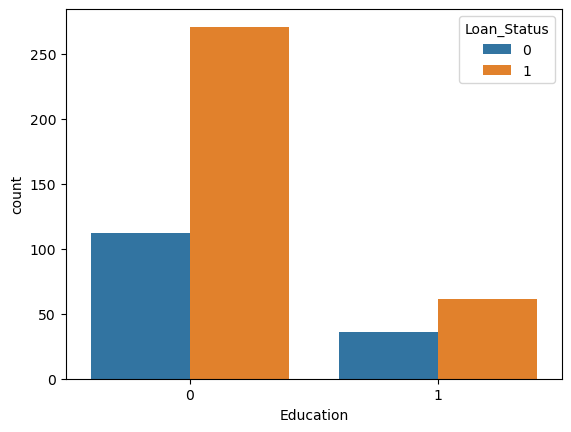

In [55]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Education', ylabel='count'>

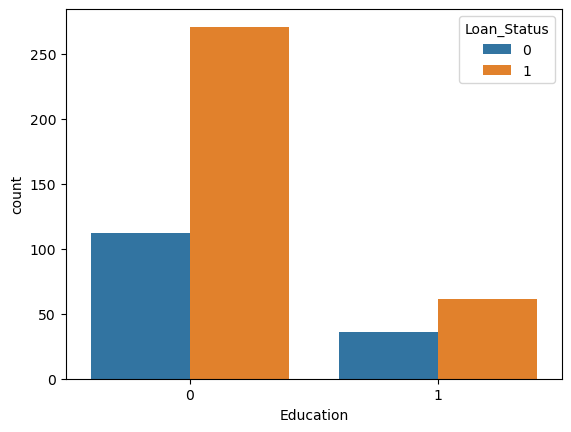

In [56]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

Train Test Split

In [57]:
#Split the data into training and testing (65-35)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,stratify=Y,random_state=20)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(480, 10) (312, 10) (168, 10)


Training the model:

KKN Model

In [59]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [60]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

Prediction and Evaluation

In [61]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [62]:
# print the training accuracy
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8108974358974359


In [63]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [64]:
# print the test accuracy
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [65]:
# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Additional metrics
precision = precision_score(Y_test, y_pred, average='weighted')  # or 'macro', 'micro', 'binary'
recall = recall_score(Y_test, y_pred, average='weighted')
f2_score = fbeta_score(Y_test, y_pred, beta=2, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F2 Score: {f2_score:.2f}")


Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 26  26]
 [  2 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.50      0.65        52
           1       0.81      0.98      0.89       116

    accuracy                           0.83       168
   macro avg       0.87      0.74      0.77       168
weighted avg       0.85      0.83      0.82       168

Precision: 0.85
Recall: 0.83
F2 Score: 0.82


Data Serialization 

In [66]:
import pickle

# Save the model so it could be used in the web app
pickle.dump(classifier,open("models/Knn.pkl", "wb"))

ROC Curve

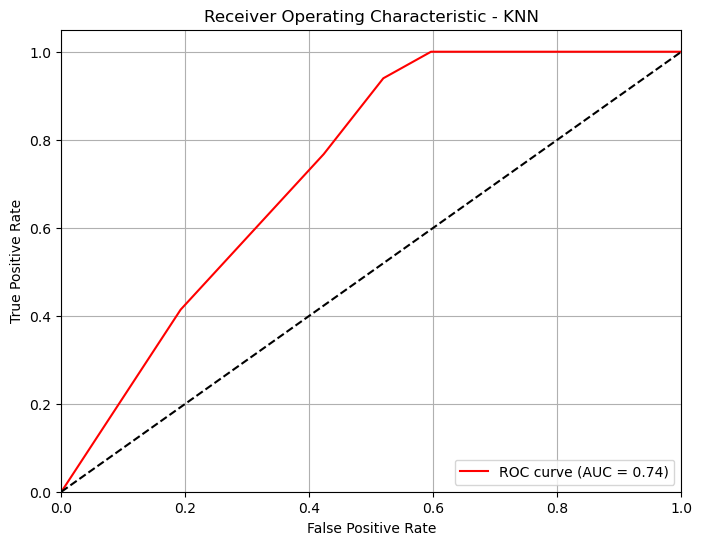

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train KNN model
knn_model = KNeighborsClassifier()  # Default n_neighbors=5
knn_model.fit(X_train, Y_train)

# Get probabilities for KNN
knn_y_prob = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_y_prob)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot KNN ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='red', label=f'ROC curve (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.grid(True)  # Optional: adds a grid for readability
plt.show()

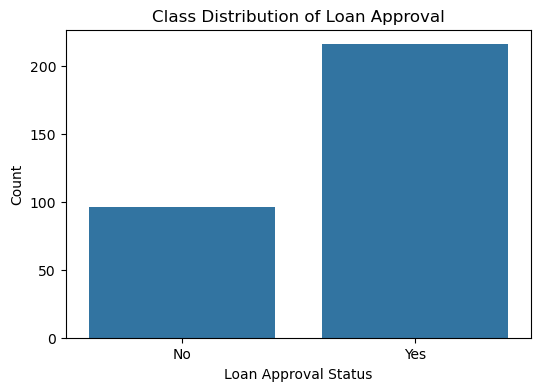

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train contains loan approval status (e.g., 0: No, 1: Yes)
class_counts = pd.Series(Y_train).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Class Distribution of Loan Approval')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()